# Fourier Series and Fourier Transform: A Detailed Connection

When we study a function in the time (or spatial) domain, it is often insightful to express it in terms of its frequency components. Two powerful tools for this are the **Fourier series** and the **Fourier transform**. Below, we explain these concepts for mathematical clarity and then provide an intuitive discussion of how they are connected.

## Fourier Series

For a **periodic function** $f(t)$ with period $T$, the Fourier series expresses $f(t)$ as a sum of harmonics (sine and cosine functions or, equivalently, complex exponentials) at **discrete frequencies**. The general form is:

$$
f(t) = \sum_{n=-\infty}^{\infty} c_n \, e^{i \frac{2\pi n}{T} t},
$$

where the Fourier coefficients $c_n$ are computed as:

$$
c_n = \frac{1}{T} \int_0^T f(t) \, e^{-i \frac{2\pi n}{T} t} \, dt.
$$

Here, the function is decomposed into a series of "notes" (its harmonics) with frequencies $\frac{n}{T}$. The coefficients $c_n$ give the amplitude and phase information of each frequency component.

## Fourier Transform

For a **non-periodic function** defined on the entire real line, the Fourier transform generalizes the discrete sum into a continuous integral. The Fourier transform $F(\omega)$ of a function $f(t)$ is defined by:

$$
F(\omega) = \int_{-\infty}^{\infty} f(t)\, e^{-i \omega t}\, dt,
$$

and its inversion (recovering $f(t)$) is given by:

$$
f(t) = \frac{1}{2\pi} \int_{-\infty}^{\infty} F(\omega)\, e^{i \omega t}\, d\omega.
$$

Unlike the Fourier series, which gives frequency components at discrete points, the Fourier transform provides a continuous spectrum of frequencies.

## Connecting Fourier Series to Fourier Transform

The Fourier series can be viewed as a special case of the Fourier transform for periodic functions. Here's the intuitive connection:

1. **Periodic Extension and Discrete Frequencies:**  
   A function defined on a finite interval $[0, T]$ is extended periodically when expressed as a Fourier series. This periodic extension restricts the frequencies to discrete values, specifically integer multiples of the fundamental frequency $\frac{1}{T}$.

2. **Increasing the Period:**  
   Imagine increasing the period $T$ of the function. As $T$ becomes very large, the spacing between the discrete frequencies,

   $$
   \Delta \omega = \frac{2\pi}{T},
   $$

   becomes smaller. In the limit as $T \to \infty$, the frequency components become so densely packed that they form a continuum. This continuum is exactly what the Fourier transform describes.

3. **Mathematical Transition:**  
   Formally, if we start with the Fourier series representation and let $T \to \infty$, the sum

   $$
   f(t) = \sum_{n=-\infty}^{\infty} c_n \, e^{i \frac{2\pi n}{T} t}
   $$

   can be replaced by an integral over the continuous frequency variable $\omega$ using the correspondence $\omega = \frac{2\pi n}{T}$. This yields the inverse Fourier transform:

   $$
   f(t) = \frac{1}{2\pi}\int_{-\infty}^{\infty} F(\omega)\, e^{i\omega t}\, d\omega.
   $$

## Intuitive Perspective

- **Discrete Notes vs. Continuous Spectrum:**  
  Think of a Fourier series as playing a musical chord on a piano with only a few discrete notes. In contrast, the Fourier transform is like a glissando where every note in a continuous range is sounded. The Fourier series picks out specific "notes" (frequencies) because of its periodicity, while the Fourier transform describes the entire continuous "spectrum" for non-repeating signals.

- **Zooming Out:**  
  When you analyze a function on a finite interval and then periodically extend it, you capture its behavior using discrete frequency components. As you expand the interval (or "zoom out" by increasing $T$), the discreteness fades into a continuous range—bridging the gap between the Fourier series and the Fourier transform.

This derivation and intuitive discussion illustrate the deep relationship between both methods. The Fourier series is optimal for periodic functions, while the Fourier transform is the natural extension for non-periodic functions, obtained by letting the period tend to infinity.


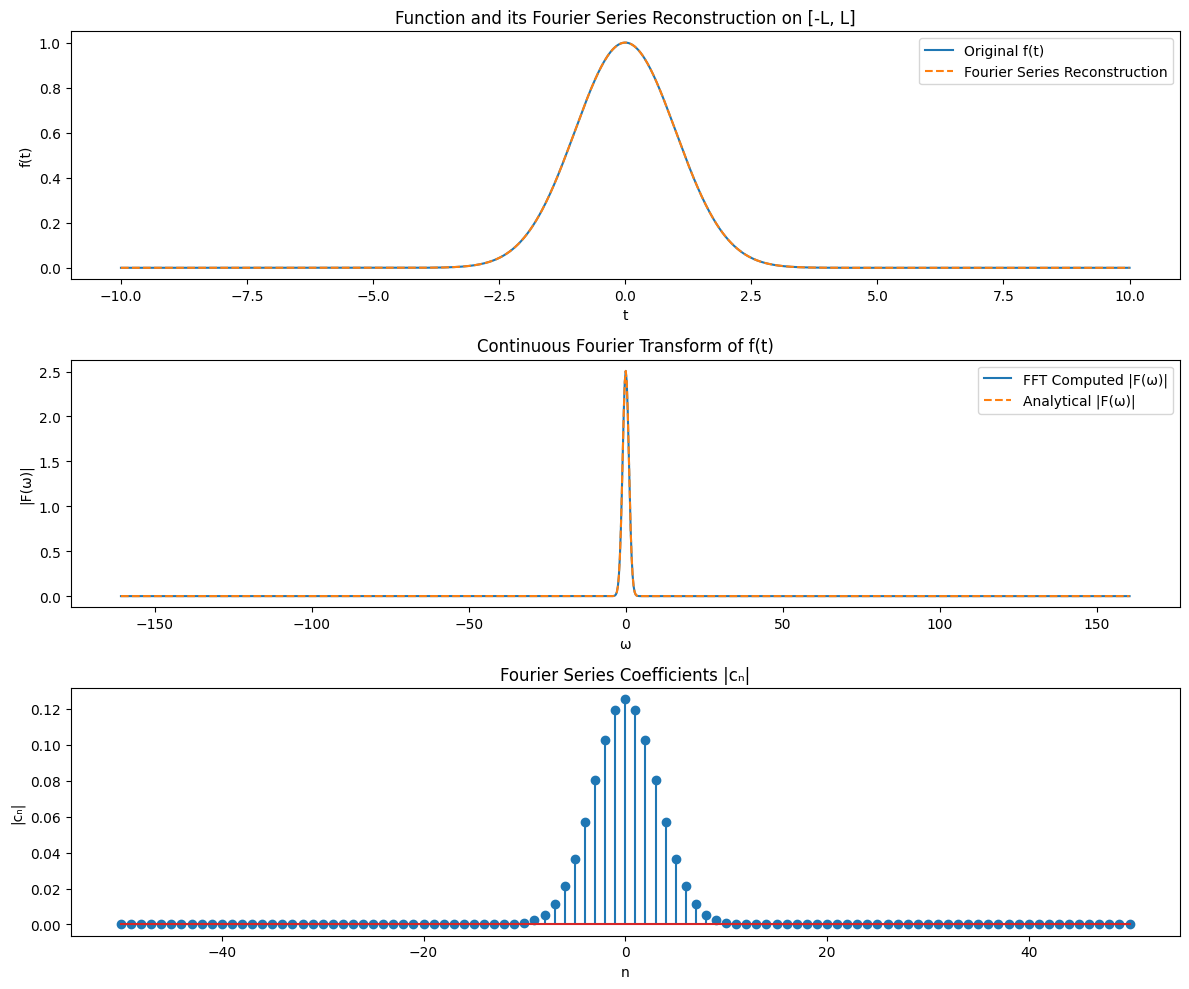

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson as simps

# Define the target function: a Gaussian.
def f(t):
    return np.exp(-t**2 / 2)

# Domain setup for time variable.
L = 10       # Define half the period so that the interval is [-L, L].
N_x = 1024   # Number of time samples.
t = np.linspace(-L, L, N_x)
f_vals = f(t)

# Compute the continuous Fourier transform via FFT.
dt = t[1] - t[0]
F_cont = np.fft.fftshift(np.fft.fft(np.fft.ifftshift(f_vals))) * dt
w = np.fft.fftshift(np.fft.fftfreq(N_x, d=dt)) * 2 * np.pi

# Analytical Fourier transform of the Gaussian:
F_analytical = np.sqrt(2 * np.pi) * np.exp(-w**2 / 2)

# Compute Fourier Series Coefficients on the interval [-L, L].
N_series = 50  # Number of terms on each side.
n_values = np.arange(-N_series, N_series + 1)
c_n = np.zeros(len(n_values), dtype=complex)

for idx, n in enumerate(n_values):
    exp_term = np.exp(-1j * np.pi * n * t / L)
    c_n[idx] = (1 / (2 * L)) * simps(f_vals * exp_term, t)

# Reconstruct f(t) from its Fourier Series coefficients.
f_reconstruct = np.zeros_like(t, dtype=complex)
for idx, n in enumerate(n_values):
    f_reconstruct += c_n[idx] * np.exp(1j * np.pi * n * t / L)

# Plot results.
plt.figure(figsize=(12, 10))

# Plot original function and its Fourier series reconstruction.
plt.subplot(3, 1, 1)
plt.plot(t, f_vals, label='Original f(t)')
plt.plot(t, f_reconstruct.real, '--', label='Fourier Series Reconstruction')
plt.legend()
plt.title('Function and its Fourier Series Reconstruction on [-L, L]')
plt.xlabel('t')
plt.ylabel('f(t)')

# Plot continuous Fourier transform (magnitude) computed via FFT versus analytical.
plt.subplot(3, 1, 2)
plt.plot(w, np.abs(F_cont), label='FFT Computed |F(ω)|')
plt.plot(w, np.abs(F_analytical), '--', label='Analytical |F(ω)|')
plt.legend()
plt.title('Continuous Fourier Transform of f(t)')
plt.xlabel('ω')
plt.ylabel('|F(ω)|')

# Plot Fourier series coefficients (magnitude).
plt.subplot(3, 1, 3)
plt.stem(n_values, np.abs(c_n))
plt.title('Fourier Series Coefficients |cₙ|')
plt.xlabel('n')
plt.ylabel('|cₙ|')

plt.tight_layout()
plt.show()
